In [1]:
#import the diabetes dataset from sklearn.datasets package
from sklearn.datasets import load_diabetes
#import train_test_split to split the dataset into train and test set
from sklearn.model_selection import train_test_split
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#storing the dataset in a variable
dataset = load_diabetes()
#what's inside the dataset?
dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
#description of the dataset e.g. number of instances and attributes, information about the attributes etc. 
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# Convert the dataset to a pandas dataframe and check statistics

In [4]:
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df["Y"] = dataset.target
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [5]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
Y      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Notice the ranges of the variables are not similar or even close. It's usually good to scale the variables to a range. To scale the attributes use normalization or standardization technique. Feature scaling often helps the algorithm to converge faster.

# Feature scaling (Normalization)

In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(df)
type(scaled_data)

numpy.ndarray

In [9]:
dataset.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
dataset.feature_names.append("Y")
dataset.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'Y']

In [11]:
df = pd.DataFrame(scaled_data)
df.columns = dataset.feature_names

In [12]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,0.468326,0.346107,0.459818,0.451668,0.367725,0.360889,0.291996,0.485557,0.503942,0.396054
std,0.218484,0.499561,0.182567,0.194806,0.169647,0.151460,0.167977,0.182010,0.183364,0.174187,0.240165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320833,0.000000,0.214876,0.309859,0.329657,0.271165,0.237013,0.141044,0.357528,0.382576,0.193146
50%,0.516667,0.000000,0.318182,0.436620,0.436275,0.355578,0.337662,0.282087,0.478057,0.500000,0.359813
75%,0.666667,1.000000,0.465909,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061,0.580997
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now all the attributes are rescaled to a range 0 to 1. I have made it easy for the algorithm to converge faster.

But there's another thing to consider. It's good to randomize the instances before training. Since it's possible that there's some bias in the data. So it's always good to shuffle the dataset before going to apply the algorithm. Otherwise the trained model will not perform well if there's any sort of bias in the dataset.

# Randomize the training instances

In [13]:
#randomize the intstances before splitting the dataset into train and test set
from sklearn.utils import shuffle
df = shuffle(df, random_state = 9)
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
381,0.166667,1.0,0.004132,0.154930,0.299020,0.285857,0.246753,0.282087,0.435853,0.303030,0.246106
392,0.300000,1.0,0.231405,0.450704,0.529412,0.484064,0.402597,0.282087,0.326986,0.742424,0.289720
155,0.366667,1.0,0.578512,0.661972,0.754902,0.642430,0.350649,0.423131,0.631167,0.681818,0.501558
439,0.683333,1.0,0.285124,0.530516,0.318627,0.323705,0.272727,0.249647,0.305040,0.560606,0.333333
331,0.866667,1.0,0.247934,0.309859,0.200980,0.220120,0.220779,0.282087,0.326986,0.484848,0.542056
249,0.433333,0.0,0.578512,0.676056,0.622549,0.461155,0.298701,0.423131,0.755916,0.530303,0.591900
97,0.366667,0.0,0.685950,0.356808,0.529412,0.502988,0.246753,0.423131,0.496584,0.787879,0.791277
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333,0.342679
301,0.483333,1.0,0.252066,0.676056,0.549020,0.463147,0.467532,0.282087,0.403177,0.636364,0.124611
166,0.233333,1.0,0.115702,0.309859,0.137255,0.142430,0.311688,0.141044,0.184664,0.121212,0.140187


# Split the dataset into train and test set

Split the dataset into train and test set. Since I have already shuffled the dataset so I set the train_test_split parameter shuffle to False.

In [14]:
#split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(df[df.keys()[:10]], df[df.keys()[10]], test_size = 0.2, shuffle = False)
#test_size = 0.2 means 20% of the data will be used for testing

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

In [16]:
X_train.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
381,0.166667,1.0,0.004132,0.154930,0.299020,0.285857,0.246753,0.282087,0.435853,0.303030
392,0.300000,1.0,0.231405,0.450704,0.529412,0.484064,0.402597,0.282087,0.326986,0.742424
155,0.366667,1.0,0.578512,0.661972,0.754902,0.642430,0.350649,0.423131,0.631167,0.681818
439,0.683333,1.0,0.285124,0.530516,0.318627,0.323705,0.272727,0.249647,0.305040,0.560606
331,0.866667,1.0,0.247934,0.309859,0.200980,0.220120,0.220779,0.282087,0.326986,0.484848


In [17]:
y_train.head(5)

381    0.246106
392    0.289720
155    0.501558
439    0.333333
331    0.542056
Name: Y, dtype: float64

# EDA and Feature engineering

In [18]:
#run functions from another notebook named plot-functions.ipynb
%run plot_funcs.ipynb

In [19]:
eda_data = df.copy()

## Data distribution of each variable and the target

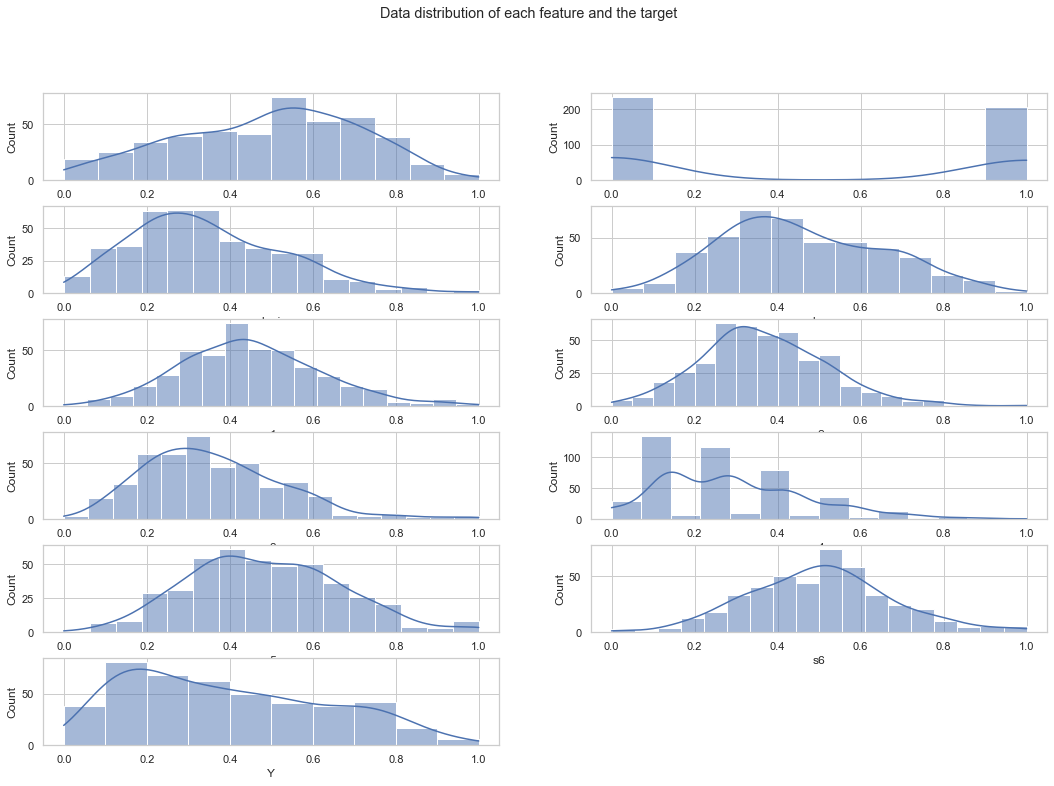

In [24]:
histplot(6, 2, data = eda_data, grid = "whitegrid", hspace = 0.3, figsize = (18, 12), suptitle = "Data distribution of each feature and the target")

## Pairwise relationships between the variables and the target

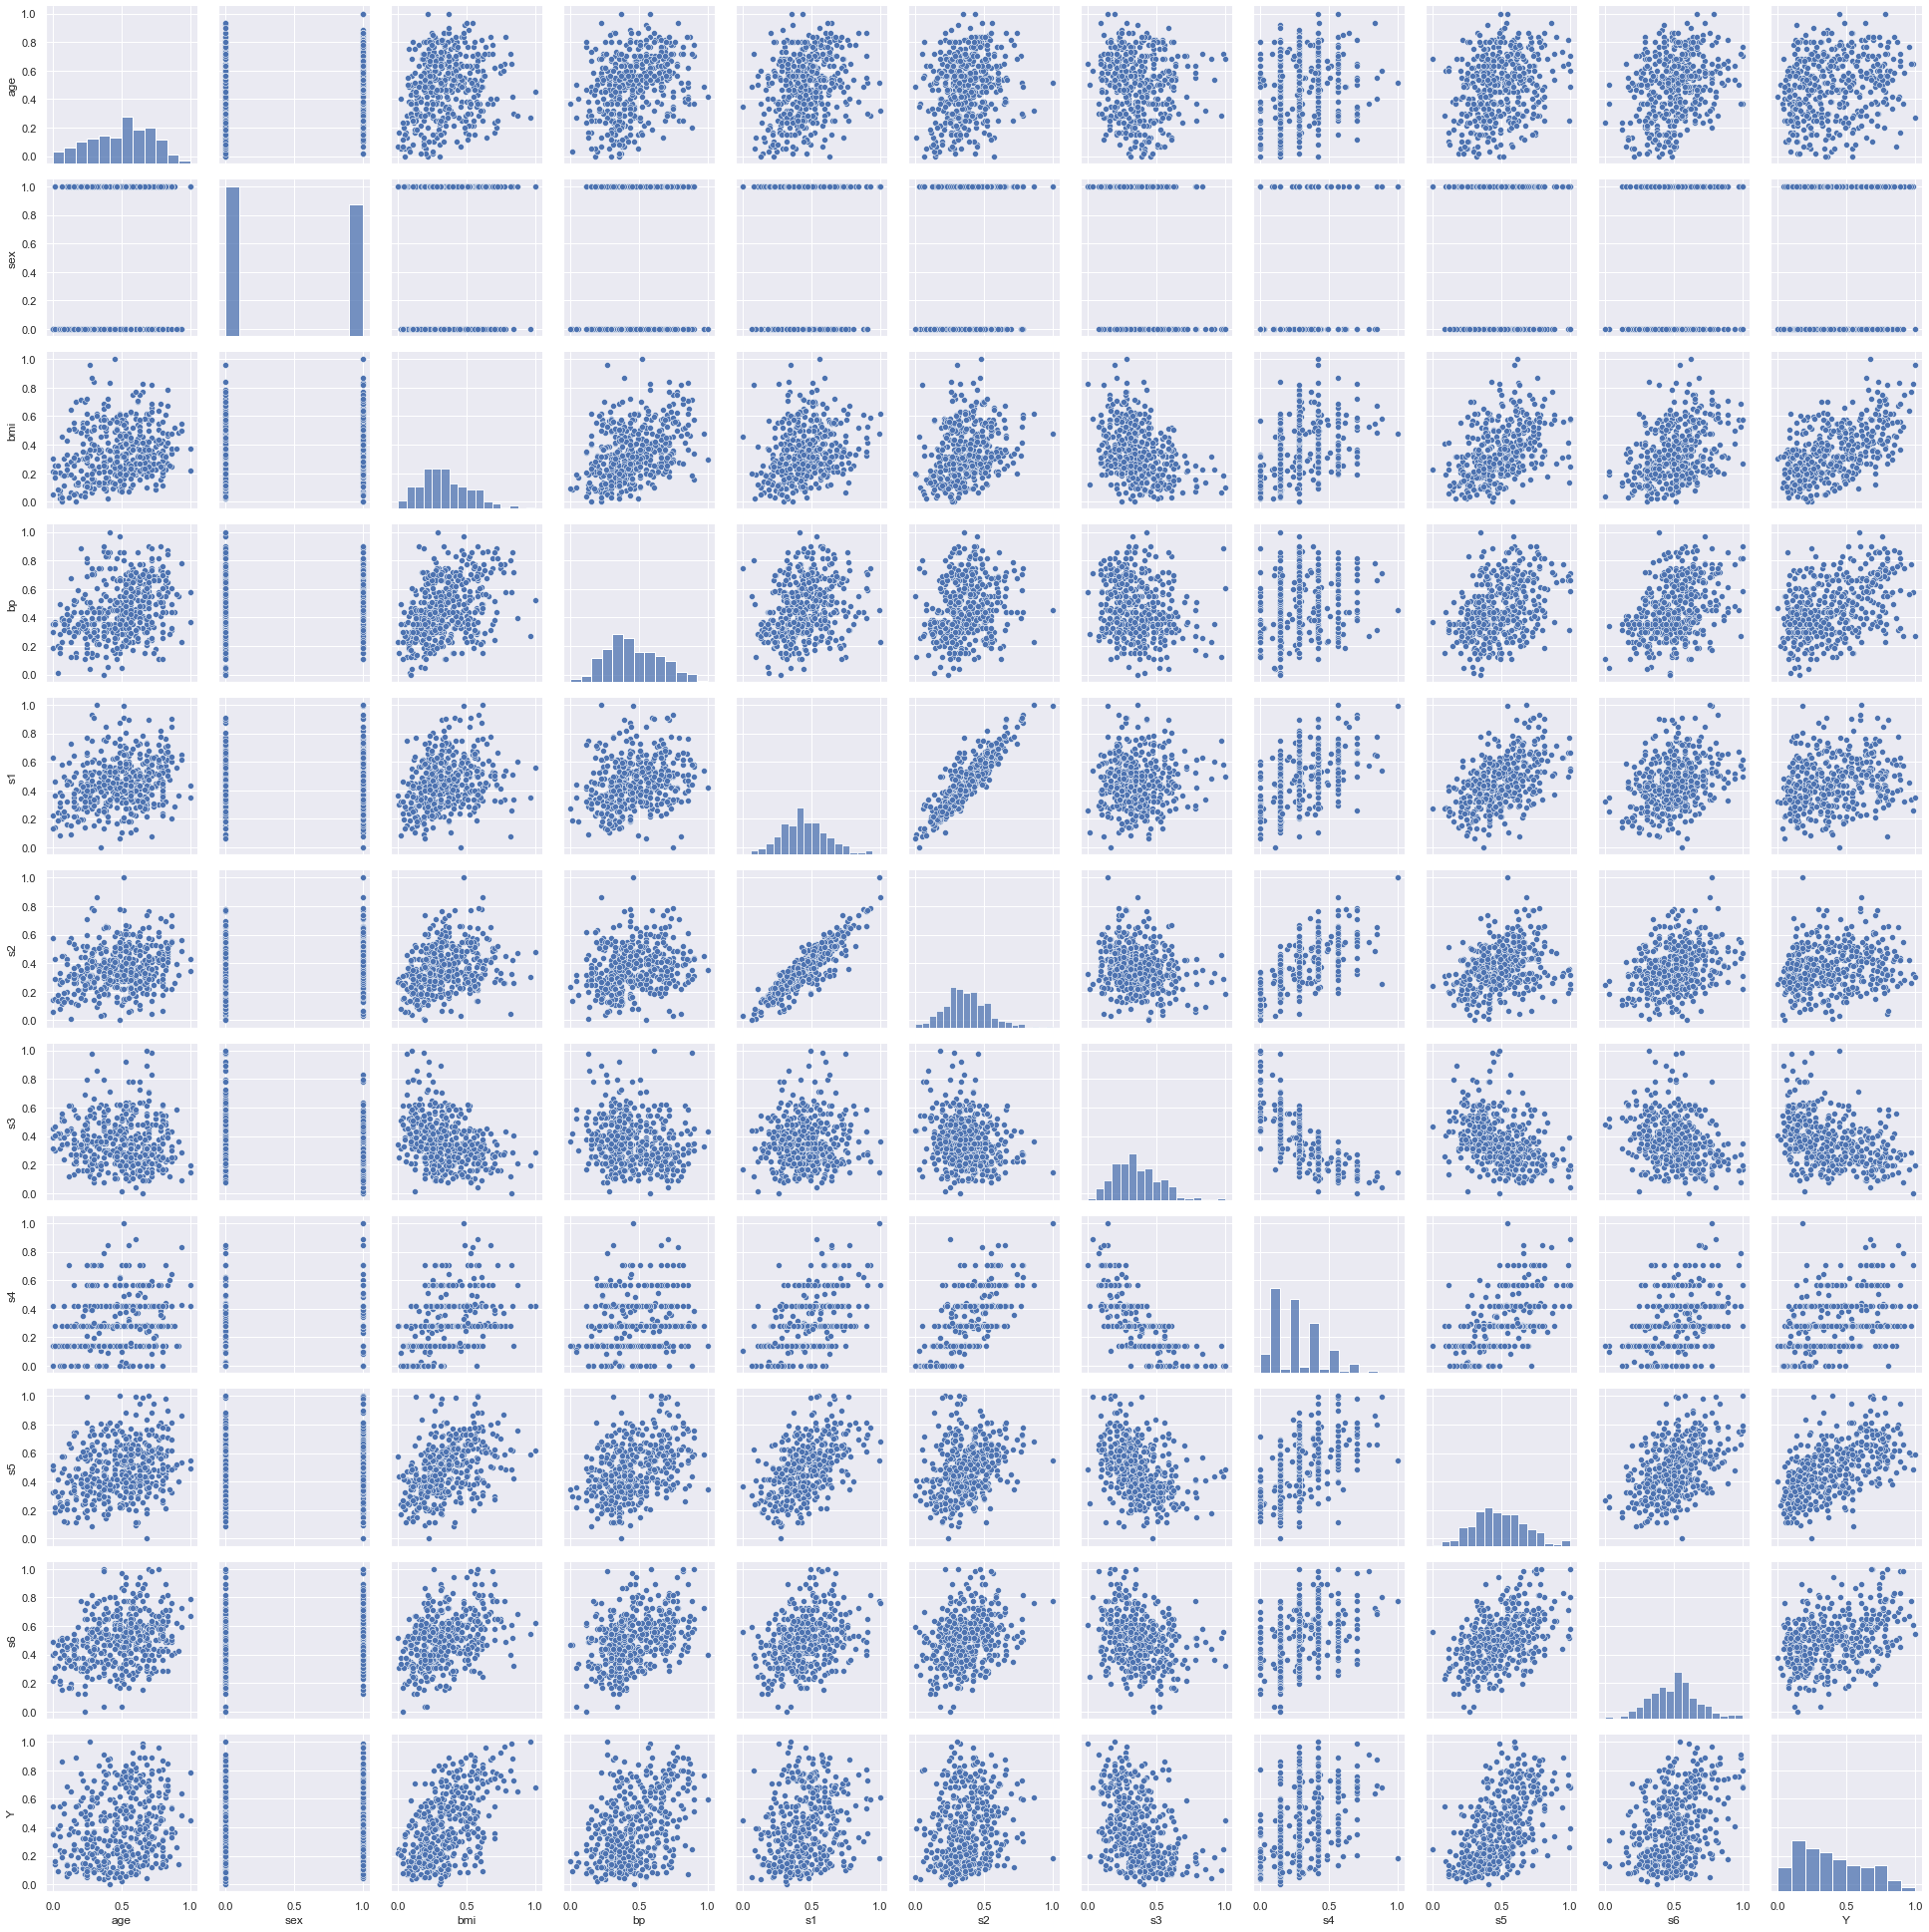

In [21]:
#pairwise relationships between the variables and the target
pairgrid(data = eda_data, diag = sns.histplot, upper = sns.scatterplot, lower = sns.scatterplot)

## Correlation matrix

Correlation matrix visualize the linear relationships between the variables and the target. The correlation coefficient ranges from -1 to 1. If the value is close to 1, there's a strong positive correlation between the variables. There's a strong negative correlation if the value is close to -1. It's recommened to use the variables that are highly correlated with the target and omit the other variables.

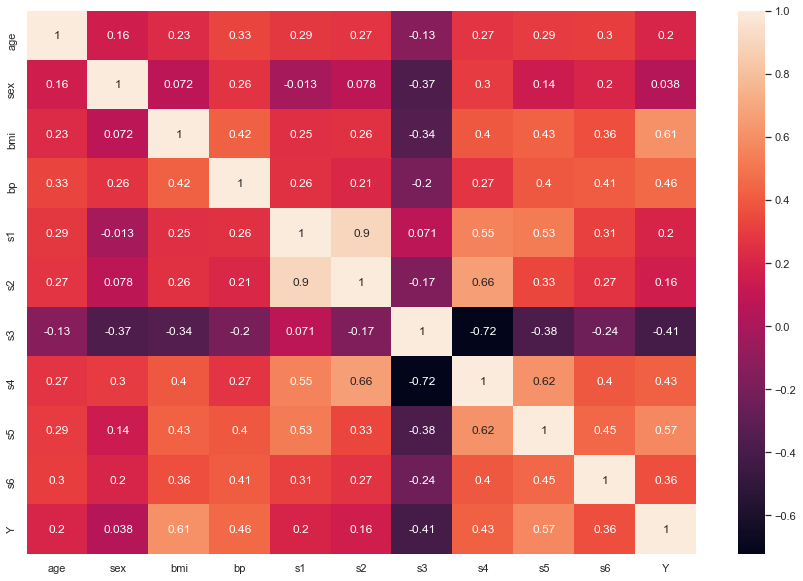

In [22]:
sns.set(rc = {"figure.figsize": (15, 10)})
df = pd.concat([X_train, y_train], axis = 1)
corr_matrix = df.corr()
sns.heatmap(data = corr_matrix, annot = True)
#prints the values inside the squares if annot is True
plt.show()

We should choose the variables that are highly correlated with the target. But always check for multi-co-linearity while choosing the attributes. If two features are highly correlated with the target and those two are strongly correlated with each other then choose one of those, not both. In this dataset features "bmi" and "s5" are highly correlated with the target "Y". But those two features are correlated with each other strongly, correlation coefficient = 0.43. If two features are correlated strongly that means their combination will not help much (think about similar attributes give correlation coefficient = 1). But correlation between "bmi" and "s5" is 0.43 whereas both of the features' correlation coefficient are >0.43. So I consider both of the features.

## Boxplot and Violinplot to check if there's any outlier

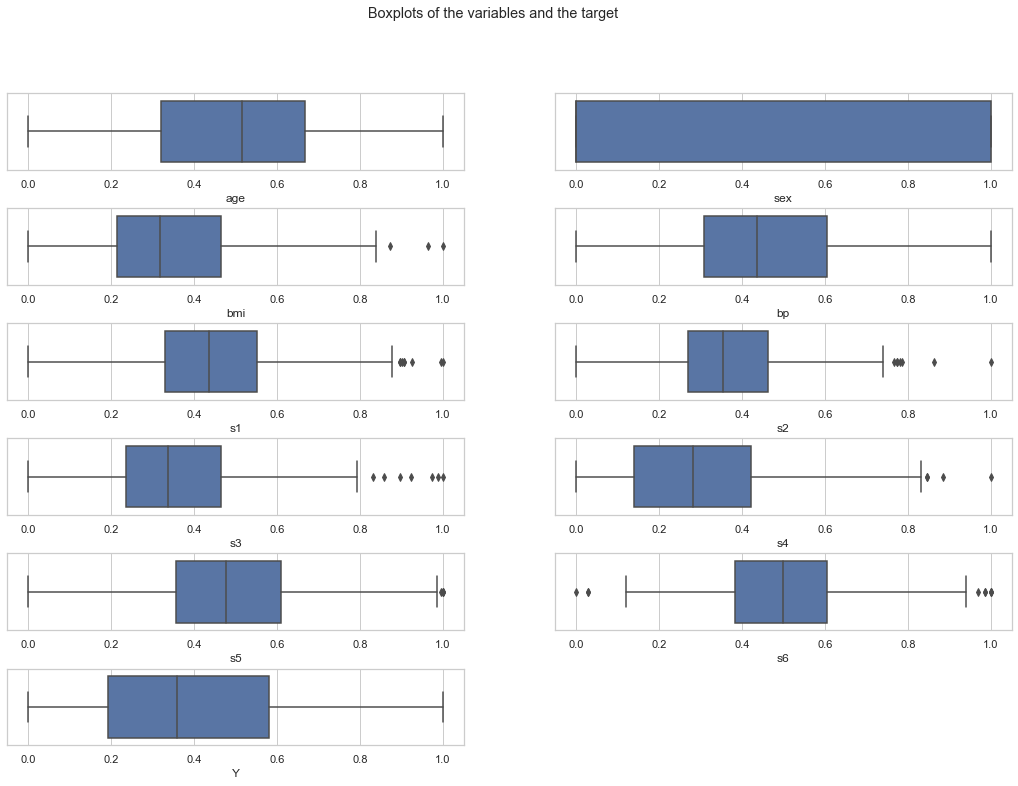

In [27]:
boxplot(6, 2, data = eda_data, grid = "whitegrid", hspace = 0.5, figsize = (18, 12), suptitle = "Boxplots of the variables and the target")

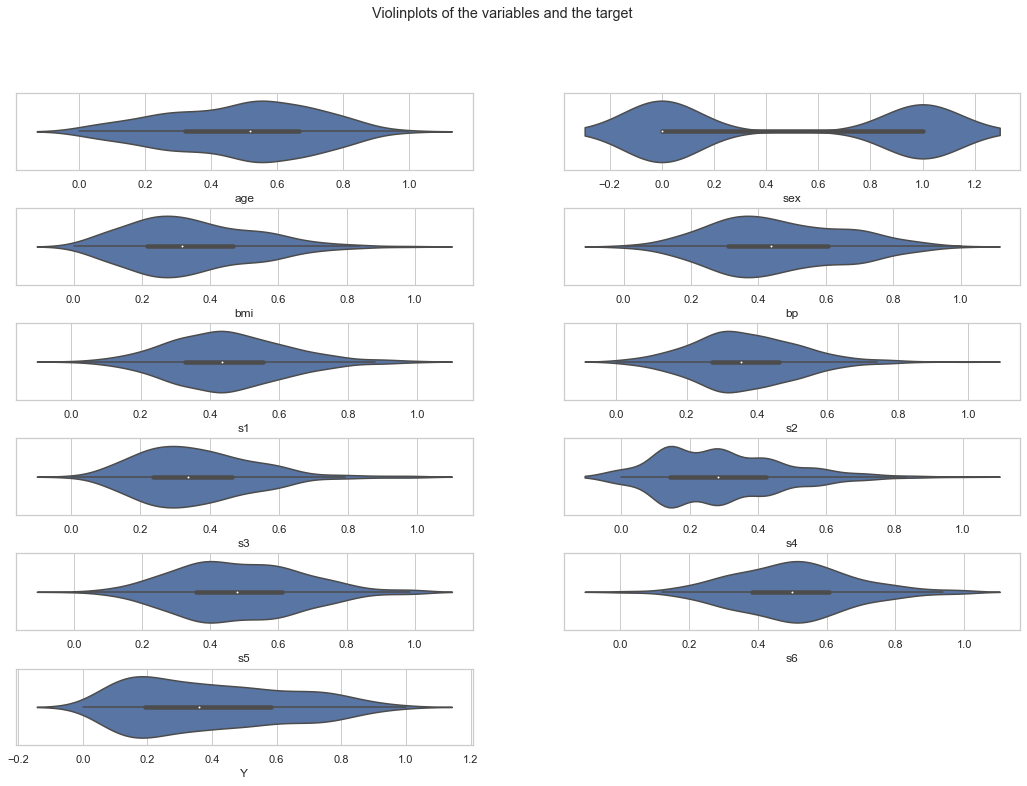

In [28]:
violinplot(6, 2, data = eda_data, grid = "whitegrid", hspace = 0.5, figsize = (18, 12), suptitle = "Violinplots of the variables and the target")

Though there's some outliers, I will not remove or modify those points. My goal is to implement Gradient Descent and see how it works not optimizing the dataset and increase the generalization accuracy in this project.

# Creating a simple dataset for Gradient Descent

In [29]:
X_train = pd.concat([X_train["bmi"], X_train["s5"]], axis = 1)
X_train.head()

,bmi,s5
381,0.004132,0.435853
392,0.231405,0.326986
155,0.578512,0.631167
439,0.285124,0.305040
331,0.247934,0.326986


In [30]:
X_test = pd.concat([X_test["bmi"], X_test["s5"]], axis = 1)
X_test.head()

,bmi,s5
203,0.462810,0.583337
14,0.247934,0.362369
112,0.425620,0.394510
404,0.553719,0.381094
364,0.322314,0.542634


In [31]:
y_train

381    0.246106
392    0.289720
155    0.501558
439    0.333333
331    0.542056
         ...   
87     0.339564
64     0.143302
210    0.517134
425    0.395639
157    0.183801
Name: Y, Length: 353, dtype: float64

In [32]:
y_test

203    0.613707
14     0.289720
112    0.688474
404    0.834891
364    0.738318
         ...   
56     0.084112
438    0.246106
126    0.230530
348    0.383178
382    0.333333
Name: Y, Length: 89, dtype: float64

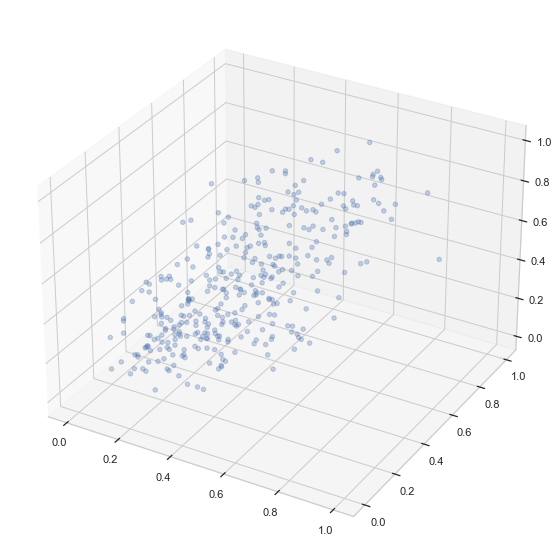

In [33]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (18, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train, alpha = 0.3)
plt.show()

In [34]:
%store X_train y_train X_test y_test

Stored 'X_train' (DataFrame)
Stored 'y_train' (Series)
Stored 'X_test' (DataFrame)
Stored 'y_test' (Series)
